In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('student_prediction.csv')
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [3]:
df.isnull().sum()

STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [6]:
df['GRADE'].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

In [16]:
from sklearn.utils import resample
#Creation of two different dataframe [real and fake]
df1 = df[(df['GRADE']== 1)]
df2 = df[(df['GRADE']== 2)]
df3 = df[(df['GRADE']== 3)]
df4 = df[(df['GRADE']== 5)]
df5 = df[(df['GRADE']== 7)]
df6 = df[(df['GRADE']== 6)]
df7 = df[(df['GRADE']== 4)]
df8 = df[(df['GRADE']== 0)]
#Unsampling of the real class since thats where the imbalance occurs
df2_unsampled = resample(df2,
                            replace= True,n_samples=35)
df3_unsampled = resample(df3,
                            replace= True,n_samples=35)
df4_unsampled = resample(df4,
                            replace= True,n_samples=35)
df5_unsampled = resample(df5,
                            replace= True,n_samples=35)
df6_unsampled = resample(df6,
                            replace= True,n_samples=35)
df7_unsampled = resample(df7,
                            replace= True,n_samples=35)
df8_unsampled = resample(df8,
                            replace= True,n_samples=35)

#Combination of the two class 
df = pd.concat([df1,df2_unsampled,df3_unsampled,df4_unsampled,df5_unsampled,df6_unsampled,df7_unsampled,df8_unsampled])
df['GRADE'].value_counts()

1    35
2    35
3    35
5    35
7    35
6    35
4    35
0    35
Name: GRADE, dtype: int64

In [17]:
df.drop(['COURSE ID'], axis =1, inplace=True)

KeyError: "['COURSE ID'] not found in axis"

In [18]:
df.drop(['STUDENTID'], axis =1, inplace=True)

KeyError: "['STUDENTID'] not found in axis"

In [19]:
X = df.drop('GRADE',axis=1)
y = df['GRADE']
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.2,random_state=1)

In [20]:
clf1 = Pipeline([('scaler',StandardScaler()), ('model', GradientBoostingClassifier())])
clf2 = Pipeline([('scaler',StandardScaler()), ('model', AdaBoostClassifier())])
clf3 = Pipeline([('scaler',StandardScaler()), ('model', ExtraTreesClassifier())])
clf4 = Pipeline([('scaler',StandardScaler()), ('model', SVC())])

In [21]:
clf1.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [22]:
pred1=clf1.predict(xtest)
pred1

array([3, 0, 2, 3, 4, 4, 3, 5, 1, 6, 5, 7, 5, 5, 7, 5, 0, 2, 1, 0, 5, 6,
       6, 7, 6, 4, 6, 5, 0, 0, 3, 6, 7, 0, 4, 1, 1, 0, 2, 7, 4, 6, 2, 1,
       6, 3, 1, 1, 1, 2, 6, 0, 3, 1, 6, 4], dtype=int64)

In [23]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.56      0.71      0.63         7
           2       0.80      0.80      0.80         5
           3       1.00      0.75      0.86         8
           4       1.00      1.00      1.00         6
           5       0.71      0.71      0.71         7
           6       0.70      0.88      0.78         8
           7       1.00      0.71      0.83         7

    accuracy                           0.82        56
   macro avg       0.85      0.82      0.83        56
weighted avg       0.85      0.82      0.83        56



<AxesSubplot:>

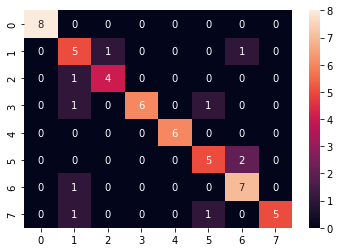

In [24]:
sns.heatmap(confusion_matrix(ytest,pred1), annot = True, fmt = '0.5g')

In [26]:
clf2.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('model', AdaBoostClassifier())])

In [27]:
pred2=clf2.predict(xtest)
pred2

array([5, 0, 4, 4, 4, 4, 5, 5, 1, 5, 4, 5, 5, 5, 5, 4, 0, 0, 1, 0, 5, 0,
       5, 5, 5, 4, 4, 5, 6, 0, 0, 4, 5, 0, 1, 1, 5, 0, 4, 5, 4, 6, 5, 5,
       5, 0, 4, 0, 1, 5, 5, 6, 0, 1, 0, 5], dtype=int64)

In [28]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.50      0.43      0.46         7
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         8
           4       0.33      0.67      0.44         6
           5       0.23      0.71      0.34         7
           6       0.33      0.12      0.18         8
           7       0.00      0.00      0.00         7

    accuracy                           0.34        56
   macro avg       0.23      0.34      0.25        56
weighted avg       0.24      0.34      0.26        56



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

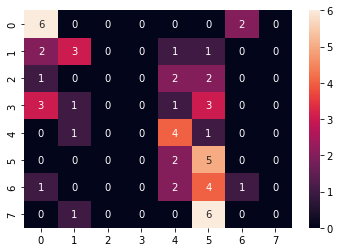

In [30]:
sns.heatmap(confusion_matrix(ytest,pred2), annot = True, fmt = '0.5g')

In [31]:
clf3.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesClassifier())])

In [32]:
pred3=clf3.predict(xtest)
pred3

array([3, 0, 2, 3, 4, 4, 3, 5, 1, 6, 5, 7, 5, 5, 7, 5, 0, 1, 7, 0, 5, 1,
       6, 7, 6, 4, 6, 7, 0, 0, 3, 6, 7, 0, 4, 2, 1, 0, 2, 7, 4, 6, 2, 1,
       6, 3, 1, 1, 7, 2, 6, 0, 3, 1, 6, 4], dtype=int64)

In [33]:
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.62      0.71      0.67         7
           2       0.80      0.80      0.80         5
           3       1.00      0.75      0.86         8
           4       1.00      1.00      1.00         6
           5       0.83      0.71      0.77         7
           6       0.78      0.88      0.82         8
           7       0.88      1.00      0.93         7

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.87      0.86      0.86        56



<AxesSubplot:>

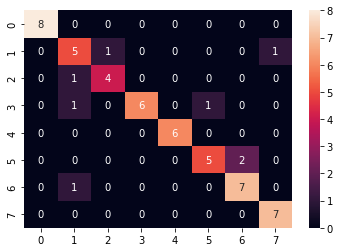

In [34]:
sns.heatmap(confusion_matrix(ytest,pred3), annot = True, fmt = '0.5g')

In [36]:
clf4.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [37]:
pred4 = clf4.predict(xtest)
pred4

array([3, 0, 2, 3, 4, 4, 3, 5, 1, 6, 5, 7, 6, 5, 7, 5, 0, 1, 7, 0, 5, 2,
       6, 7, 3, 4, 6, 1, 0, 0, 3, 6, 7, 0, 4, 2, 1, 0, 2, 7, 4, 6, 2, 6,
       6, 1, 1, 2, 6, 2, 3, 0, 3, 1, 6, 4], dtype=int64)

In [38]:
print(classification_report(ytest,pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.57      0.57      0.57         7
           2       0.71      1.00      0.83         5
           3       0.71      0.62      0.67         8
           4       1.00      1.00      1.00         6
           5       1.00      0.71      0.83         7
           6       0.80      1.00      0.89         8
           7       0.83      0.71      0.77         7

    accuracy                           0.82        56
   macro avg       0.83      0.83      0.82        56
weighted avg       0.83      0.82      0.82        56



<AxesSubplot:>

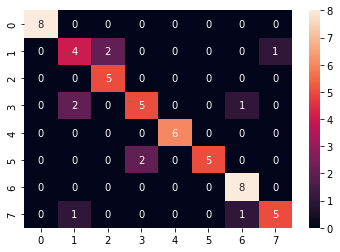

In [39]:
sns.heatmap(confusion_matrix(ytest,pred4), annot = True, fmt = '0.5g')